two classes and ['InnerFault', 'outerFault'] and two features speed , and vibration

In [1]:

#moving avg window
#datasetdir = "../datasets/allfaultdatasetfiltered13.csv"
figuredir = "../figures/svmv2/"

import os

# You should change 'test' to your preferred folder.
#CHECK_FOLDER = os.path.isdir(datasetdir)

# You should change 'test' to your preferred folder.
CHECK_FOLDER = os.path.isdir(figuredir)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(figuredir)
    print("created folder : ", figuredir)

else:
    print(figuredir, "folder already exists.")


../figures/svmv2/ folder already exists.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
plt.rcParams["figure.figsize"] = (15,8)

In [3]:
#df = pd.read_csv("../datasets/allfaultdatasetfiltered13.csv")
## to rename outerfault 
df = pd.read_csv("../datasets/allfaultdatasetfiltered13.csv", index_col ="class" )
"""Droping Series Column which is no longer required 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

df.drop(['B', 'C'], axis=1)

also rearrange columns order
df = df[['speed','vibration','Faults']]

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
#df.rename(columns={"A": "a", "B": "c"})
"""
df = df.drop(['series'], axis=1)
df = df.rename(index={'BallFault':'Ball'})
df = df.rename(index={'InnerFault':'Innerrace'})
df = df.rename(index={'outerFault':'Outerrace'})
df = df.reset_index()
df = df.rename(columns  ={'class':'Faults'})
df = df[['speed','vibration','Faults']]
df.head() , df['Faults'].unique()

(      speed  vibration Faults
 0  4.217042   0.003062   Ball
 1  4.219672   0.004049   Ball
 2  4.221645   0.001418   Ball
 3  0.036346  -0.002199   Ball
 4  0.036017  -0.003515   Ball,
 array(['Ball', 'Innerrace', 'Outerrace'], dtype=object))

In [4]:
df.head()

,speed,vibration,Faults
0,4.217042,0.003062,Ball
1,4.219672,0.004049,Ball
2,4.221645,0.001418,Ball
3,0.036346,-0.002199,Ball
4,0.036017,-0.003515,Ball


In [5]:
df.info

<bound method DataFrame.info of             speed  vibration     Faults
0        4.217042   0.003062       Ball
1        4.219672   0.004049       Ball
2        4.221645   0.001418       Ball
3        0.036346  -0.002199       Ball
4        0.036017  -0.003515       Ball
...           ...        ...        ...
5667608  4.202576  -0.004830  Outerrace
5667609  4.198959  -0.003515  Outerrace
5667610  4.279838  -0.002857  Outerrace
5667611  0.037332  -0.006146  Outerrace
5667612  0.037661  -0.009105  Outerrace

[5667613 rows x 3 columns]>

In [6]:
# it change style and colour for graph 
#from yellowbrick.classifier import ClassificationReport
## OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)
plt.rcParams['agg.path.chunksize'] = 100000

sns.countplot(x = 'Faults', data=df )

# to save plots in high ddefinition 
#plt.savefig("../figures/class_distribution_beforedropouts.png")
plt.ylabel("Records")
plt.savefig(figuredir + "class_distribution_beforedropouts.png", bbox_inches='tight', dpi=600)
plt.show()

#df['Faults'].unique()

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
g = sns.lineplot(x="speed", y="vibration",hue= 'Faults',
                data=df.reset_index(), palette="tab10" )

plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

g.legend(loc= 'upper right')
g.legend_.set_title('Faults')

plt.savefig(figuredir +"vibration vs speed.png", bbox_inches='tight', dpi=600)

In [7]:
Ball = df[df['Faults']=='Ball']
Innerrace = df[df['Faults']=='Innerrace']
Outerrace = df[df['Faults']=='Outerrace']


Ball.head(5), Innerrace.head(5) , Outerrace.head(5)

(      speed  vibration Faults
 0  4.217042   0.003062   Ball
 1  4.219672   0.004049   Ball
 2  4.221645   0.001418   Ball
 3  0.036346  -0.002199   Ball
 4  0.036017  -0.003515   Ball,
             speed  vibration     Faults
 1889180  0.037990   0.248711  Innerrace
 1889181  0.037661   0.249040  Innerrace
 1889182  0.037990   0.248382  Innerrace
 1889183  0.037661   0.250355  Innerrace
 1889184  0.037332   0.251013  Innerrace,
             speed  vibration     Faults
 3778490  4.198302  -0.007461  Outerrace
 3778491  4.214083  -0.006474  Outerrace
 3778492  4.210795  -0.006474  Outerrace
 3778493  4.248933  -0.005817  Outerrace
 3778494  4.272934  -0.005159  Outerrace)

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
g = sns.lineplot(x="speed", y="vibration",
                data=Ball.reset_index(), color = 'blue' )

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Ball vibration vs speed.png", bbox_inches='tight', dpi=600)

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
h = sns.lineplot(x="speed", y="vibration",
                data=Innerrace.reset_index(), color = 'orange' )

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Innerrace vibration vs speed.png", bbox_inches='tight', dpi=600)

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
i = sns.lineplot(x="speed", y="vibration",
                data=Outerrace.reset_index(), color = 'green' )


#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Outerrace vibration vs speed.png", bbox_inches='tight', dpi=600)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Vibration vs Speed')

# Ball
sns.lineplot(ax=axes[0],x="speed", y="vibration",data=Ball.reset_index(), color = 'blue' )
axes[0].set_title('Ball')

# Outerrace
sns.lineplot(ax=axes[1],x="speed", y="vibration",data=Outerrace.reset_index(), color = 'green' )
axes[1].set_title('Outerrace')

# Innerrace
sns.lineplot(ax=axes[2],x="speed", y="vibration",data=Innerrace.reset_index(), color = 'orange' )
axes[2].set_title('Innerrace')

plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Vibration vs Speed.png", bbox_inches='tight', dpi=600)

In [9]:
df = df.drop_duplicates(subset = ["speed", 'vibration'])

print(df)

            speed  vibration     Faults
0        4.217042   0.003062       Ball
1        4.219672   0.004049       Ball
2        4.221645   0.001418       Ball
3        0.036346  -0.002199       Ball
4        0.036017  -0.003515       Ball
...           ...        ...        ...
5667456  4.151615  -0.016340  Outerrace
5667459  2.739196  -0.009105  Outerrace
5667542  3.131096  -0.001213  Outerrace
5667560  1.329083  -0.000555  Outerrace
5667578  0.155362   0.001747  Outerrace

[757558 rows x 3 columns]


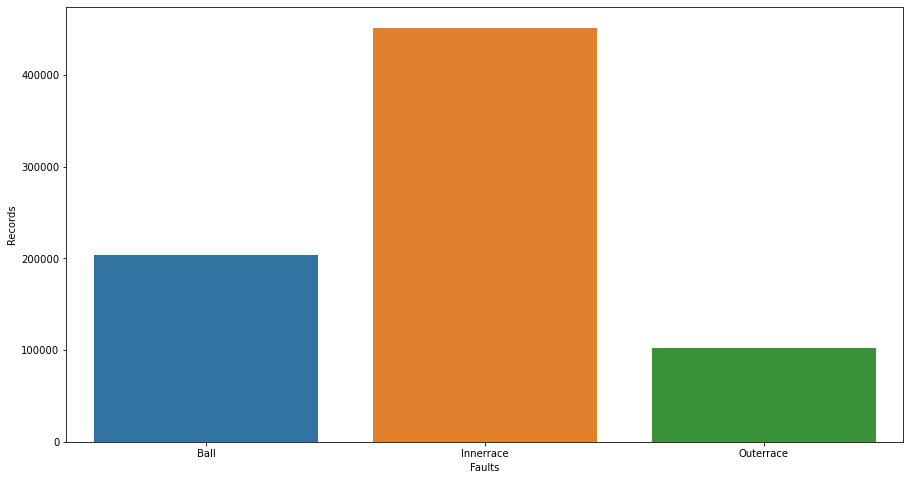

In [10]:
sns.countplot(x = 'Faults', data=df)

# to save plots in high ddefinition 
#plt.savefig("../figures/class_distribution_beforedropouts.png")
plt.ylabel("Records")
plt.savefig(figuredir +"class_distribution_afterdropouts.png", bbox_inches='tight', dpi=600)
plt.show()

In [11]:
#['BallFault', 'InnerFault', 'outerFault']

BallFaultlenght = len(df[df['Faults']=='Ball'])
InnerFaultlenght = len(df[df['Faults']=='Innerrace'])
outerFaultlenght = len(df[df['Faults']=='Outerrace'])


#BallFaultlenght = 20000
#InnerFaultlenght = 20000 
#outerFaultlenght = 20000

print(BallFaultlenght)
print(InnerFaultlenght)
print(outerFaultlenght)

203913
451728
101917


In [12]:

newBallFault = df[df['Faults']=='Ball'].iloc[0:outerFaultlenght]
newInnerFault = df[df['Faults']=='Innerrace'].iloc[0:outerFaultlenght]
newouterFault = df[df['Faults']=='Outerrace'].iloc[0:outerFaultlenght]

newBallFault , newInnerFault , newouterFault

(           speed  vibration Faults
 0       4.217042   0.003062   Ball
 1       4.219672   0.004049   Ball
 2       4.221645   0.001418   Ball
 3       0.036346  -0.002199   Ball
 4       0.036017  -0.003515   Ball
 ...          ...        ...    ...
 722641  4.187452  -0.021273   Ball
 722642  4.264386  -0.022588   Ball
 722651  4.092436  -0.007790   Ball
 722681  4.127286  -0.019957   Ball
 722682  4.229864  -0.020944   Ball
 
 [101917 rows x 3 columns],
             speed  vibration     Faults
 1889180  0.037990   0.248711  Innerrace
 1889181  0.037661   0.249040  Innerrace
 1889182  0.037990   0.248382  Innerrace
 1889183  0.037661   0.250355  Innerrace
 1889184  0.037332   0.251013  Innerrace
 ...           ...        ...        ...
 2223245  4.086847   0.223390  Innerrace
 2223248  4.106573   0.223719  Innerrace
 2223250  1.064749   0.230624  Innerrace
 2223257  4.159177   0.201357  Innerrace
 2223259  4.242358   0.189847  Innerrace
 
 [101917 rows x 3 columns],
             spe

In [13]:
new_df = (newBallFault)
new_df = new_df.append(newInnerFault)
new_df = new_df.append(newouterFault)


new_df

,speed,vibration,Faults
0,4.217042,0.003062,Ball
1,4.219672,0.004049,Ball
2,4.221645,0.001418,Ball
3,0.036346,-0.002199,Ball
4,0.036017,-0.003515,Ball
...,...,...,...
5667456,4.151615,-0.016340,Outerrace
5667459,2.739196,-0.009105,Outerrace
5667542,3.131096,-0.001213,Outerrace
5667560,1.329083,-0.000555,Outerrace


In [14]:
df = new_df

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
g = sns.lineplot(x="speed", y="vibration",
                data=newBallFault.reset_index(), color = 'blue' )

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Ball vibration vs speed afterdropouts.png", bbox_inches='tight', dpi=600)

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
h = sns.lineplot(x="speed", y="vibration",
                data=newInnerFault.reset_index(), color = 'orange' )

#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Innerrace vibration vs speed afterdropouts.png", bbox_inches='tight', dpi=600)

#df['vibration'].plot(color='b',figsize = (8,8))
""", alpha = 0.2"""
i = sns.lineplot(x="speed", y="vibration",
                data=newouterFault.reset_index(), color = 'green' )


#plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Outerrace vibration vs speed afterdropouts.png", bbox_inches='tight', dpi=600)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)
fig.suptitle('Vibration vs Speed')

# Ball
sns.lineplot(ax=axes[0],x="speed", y="vibration",data=newBallFault.reset_index(), color = 'blue' )
axes[0].set_title('Ball')

# Outerrace
sns.lineplot(ax=axes[1],x="speed", y="vibration",data=newouterFault.reset_index(), color = 'green' )
axes[1].set_title('Outerrace')

# Innerrace
sns.lineplot(ax=axes[2],x="speed", y="vibration",data=newInnerFault.reset_index(), color = 'orange' )
axes[2].set_title('Innerrace')

plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)

#g.legend(loc= 'upper right')
#g.legend_.set_title('Faults')

plt.savefig(figuredir +"Vibration vs Speed afterdropouts.png", bbox_inches='tight', dpi=600)

sns.countplot(x = 'Faults', data=df)

# to save plots in high ddefinition 
#plt.savefig("../figures/class_distribution_beforedropouts.png")
plt.ylabel('Records')
plt.savefig(figuredir +"class_distribution_after_equal_distribution.png", bbox_inches='tight', dpi=600)
plt.show()

In [15]:
class2idx = {
    "Ball": 0,
    "Innerrace":1,
    "Outerrace":2

}

idx2class = {v: k for k, v in class2idx.items()}

#df['Faults'].replace(class2idx, inplace=True)
#df['Faults'].unique()

In [18]:
# droping series
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X.head() , y.head()

(      speed  vibration
 0  4.217042   0.003062
 1  4.219672   0.004049
 2  4.221645   0.001418
 3  0.036346  -0.002199
 4  0.036017  -0.003515,
 0    Ball
 1    Ball
 2    Ball
 3    Ball
 4    Ball
 Name: Faults, dtype: object)

In [19]:
y.unique() , len(y.unique())

(array(['Ball', 'Innerrace', 'Outerrace'], dtype=object), 3)

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1,0.4, 0.9,0.01]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           refit = True, 
                           verbose = 3)

grid_search = grid_search.fit(X_train, y_train)


In [ ]:
accuracy = grid_search.best_score_
accuracy

In [ ]:
grid_search.best_params_

# Fitting Kernel SVM to the Training set according to grid serach parameters 
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1000], 'kernel': ['rbf'], 'gamma': [0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           refit = True, 
                           verbose = 3)

grid_search = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
accuracy = grid_search.best_score_
accuracy

In [ ]:
grid_search.best_params_

In [ ]:
# Predicting the Test set results
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred)).rename(columns=idx2class, index=idx2class)


In [ ]:
sns.heatmap(confusion_matrix_df, annot=True)

In [ ]:
target_names = { k for k, v in class2idx.items()}
f1score = classification_report(y_test, y_pred, target_names=target_names)
print(f1score)

In [ ]:
sns.heatmap(confusion_matrix_df/np.sum(confusion_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')

#,  ax=axes[0]).set_title('Train-Val Accuracy/Epoch'


plt.savefig(figuredir +"confusion_matrix1.png", bbox_inches='tight', dpi=600)
plt.show()

In [32]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [33]:
#{'C': [1000], 'kernel': ['rbf'], 'gamma': [0.9]}
clf = OneVsRestClassifier(SVC(kernel='rbf', probability=True, class_weight='balanced', gamma= 0.9, C=1000 ), n_jobs=-1)

In [34]:
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1000, class_weight='balanced', gamma=0.9,
                                  probability=True),
                    n_jobs=-1)

In [35]:
# Predicting the Test set results
y_pred = clf.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25971,     0,  7616],
       [    0, 33492,    19],
       [ 7389,     0, 26411]], dtype=int64)

In [37]:
target_names = { k for k, v in class2idx.items()}
f1score = classification_report(y_test, y_pred, target_names=target_names)
print(f1score)

              precision    recall  f1-score   support

   Innerrace       0.78      0.77      0.78     33587
   Outerrace       1.00      1.00      1.00     33511
        Ball       0.78      0.78      0.78     33800

    accuracy                           0.85    100898
   macro avg       0.85      0.85      0.85    100898
weighted avg       0.85      0.85      0.85    100898



In [38]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred)).rename(columns=idx2class, index=idx2class)


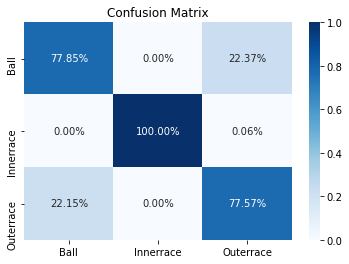

In [39]:
sns.heatmap(confusion_matrix_df/np.sum(confusion_matrix_df), annot=True, 
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')

#,  ax=axes[0]).set_title('Train-Val Accuracy/Epoch'


plt.savefig(figuredir +"confusion_matrix2.png", bbox_inches='tight', dpi=600)
plt.show()